<center><img src="img/aism_logo.png" alt="Logo AI Saturdays Madrid" title="Logo AI Saturdays Madrid" width="150"/></center>

# Week 1 Challenge - Bank Classifier

Las campañas de marketing de los bancos dependen de los datos de los clientes. La cantidad de datos que manejan los bancos es tan grande, que es imposible que un analista de datos saque el máximo partido a esta información de modo que pueda ser útil de forma realmente efectiva en el proceso de toma de decisiones.

Aquí es donde los modelos de aprendizaje automático están ayudando a aumentar de forma drástica el mejor desempeño de estas campañas al permitir encontrar patrones en los datos que de otro modo pasarían desapercibidos para los analistas.

## Dataset

El conjunto de datos con el que vamos a trabajar en este challenge está relacionado con una campaña de marketing directo de una institución bancaria portuguesa. Durante la campaña, basada en llamadas telefónicas, a menudo se ha requerido más de un contacto con el mismo cliente para ofrecerle la contratación de un depósito bancario.

Nuestro objetivo es predecir si el cliente se suscribirá a un depósito a plazo, analizando y preprocesando los datos. Esos datos se utilizarán después para  construir un modelo de clasificación utilizando el algoritmo k-NN.

Las variables de entrada o características son:
* `age` - Edad del cliente.
* `job` - Tipo de trabajo que desempeña el cliente.
* `marital` - Estado civil.
* `education` - Nivel educativo.
* `default` - Indica si tiene crédito en mora.
* `balance` - Balance del saldo del cliente.
* `housing` - Indica si tiene contratada una hipoteca.
* `loan` - Indica si tiene un crédito personal.
* `contact` -  Forma en la que se ha contactado con el cliente.
* `day` - Día del mes en el que se realizó el último contacto.
* `month` - Mes del año en el que se realizó el último contacto.
* `duration` - Duración del último contacto, en segundos. **¡Importante!** Este atributo afecta en gran medida la variable de salida (por ejemplo, si `duration= 0`, entonces `y='no'`). Sin embargo, se desconoce la duración antes de realizar una llamada. Además, después del final de la llamada, obviamente se conoce `y`. Por lo tanto, esta variable de entrada solo debe incluirse con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista, ya que si no estaríamos ante lo que se conoce como fuga de datos _(data lekeage)_.
* `campaign` - Número de veces que se le ha contactado en esta campaña.
* `pdays` -  Número de días que han pasado después de que el cliente fue contactado por última vez desde una campaña anterior, `pdays=-1` si no se le ha contactado previamente.
* `previous` - Número de contactos realizados antes de esta campaña y para este cliente.
* `poutcome` - Resultado de la campaña de marketing anterior.

La variable que queremos predecir es `y`, la cual indica si el cliente finalmente ha suscrito un depósito a plazo o no.

Puedes encontrar más información de este dataset en [UCI Machine Learning Repository - Bank Marketing Data Set](https://archive.ics.uci.edu/ml/datasets/bank+marketing).

## Importar librerías

A continuación, te dejamos indicadas las librerías que creemos que vas a necesitar importar para completar el _challenge_, pero puedes importar las que creas necesarias.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

## Cargar los datos

**Crear un DataFrame llamado `data` a partir del CSV que contiene los datos de la campaña de marketing. ¡Ojo con el separador!**

In [7]:
data = pd.read_csv('bank.csv', sep =';')

## Exploración general del dataset

**Muestra las 10 primeras filas del conjunto de datos.**

In [8]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


**Imprime el número de filas (registros u observaciones) y columnas (variables o características) del conjunto de datos.**

In [9]:
data.shape

(45211, 17)

**Muestra la información general del dataset.**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Muestra el número de valores únicos en cada columna.**

In [11]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

**Comprueba la existencia de valores nulos en el dataset.**

In [12]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Muestra una descripción estadística básica del dataset.**

In [13]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Según su tipo, cuáles de las variables de entrada son categóricas y cuáles numéricas.**

In [14]:
#PRUEBAS
tipos_de_datos = data.dtypes
print(tipos_de_datos)
tipo_categorico = tipos_de_datos[tipos_de_datos == 'object'].index
#print(tipo_categorico)
tipo_numerico = tipos_de_datos[tipos_de_datos != 'object'].index
print(tipo_categorico)
print(tipo_numerico)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [15]:
columnas_categoricas = data.select_dtypes(include=['object'])
columnas_numericas = data.select_dtypes(include=['int64'])
print("Columnas Categóricas:")
print(columnas_categoricas.columns)
print("Columnas Numéricas:")
print(columnas_numericas.columns)

Columnas Categóricas:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Columnas Numéricas:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


**Muestras los posibles valores de cada una de las variables categóricas y sus valores absolutos.**

In [16]:
columnas_categoricas = data.select_dtypes(include=['object'])
columnas_categoricas.value_counts()

job          marital  education  default  housing  loan  contact   month  poutcome  y  
blue-collar  married  secondary  no       yes      no    unknown   may    unknown   no     721
management   married  tertiary   no       no       no    cellular  aug    unknown   no     657
blue-collar  married  primary    no       yes      no    unknown   may    unknown   no     642
technician   married  secondary  no       no       no    cellular  aug    unknown   no     420
management   single   tertiary   no       no       no    cellular  aug    unknown   no     346
                                                                                          ... 
             married  tertiary   no       yes      no    cellular  jan    success   no       1
                                                                          other     yes      1
                                                                   feb    failure   yes      1
                                                         

In [17]:
columnas_categoricas = data.select_dtypes(include=['object'])
#print(columnas_categoricas)
for i in columnas_categoricas:
    valores_absolutos = columnas_categoricas[i].value_counts()
    print(valores_absolutos)
    #print(i)
    print("\n")

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


default
no     44396
yes      815
Name: count, dtype: int64


housing
yes    25130
no     20081
Name: count, dtype: int64


loan
no     37967
yes     7244
Name: count, dtype: int64


contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64


poutcome
unknown    36959
failure 

## Análisis exploratorio de la variable objetivo

**La variable objetivo es aquiella que queremos predecir. Antes de comenzar a hacer modificaciones en el dataset, vamos a crearnos una copia sobre la que vamos a trabajar para conservar así el original sin cambios. Para ello crea un nuevo DataFrame llamado `bank_data` que sea una copia del original.**

In [18]:

bank_data = data.copy()
print(bank_data)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

**Cambia el nombre de la variable objetivo `y` por `deposit`.**

In [19]:
bank_data.columns = bank_data.columns.str.replace('y', 'deposit')
print(bank_data.columns)
print(bank_data)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'dadeposit', 'month', 'duration', 'campaign',
       'pdadeposits', 'previous', 'poutcome', 'deposit'],
      dtype='object')
       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5

**Cambia los valores de la variable `deposit` de `yes/no` por `1/0` respectivamente.**

In [20]:
print(bank_data['deposit'])
mapeo_deposit = {'yes': 1, 'no': 0}
bank_data['deposit'] = bank_data['deposit'].replace(mapeo_deposit)
print(bank_data['deposit'])

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: deposit, Length: 45211, dtype: object
0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: deposit, Length: 45211, dtype: int64


**Visualiza la variable objetivo con un countplot. ¿Qué conclusión sacas?**

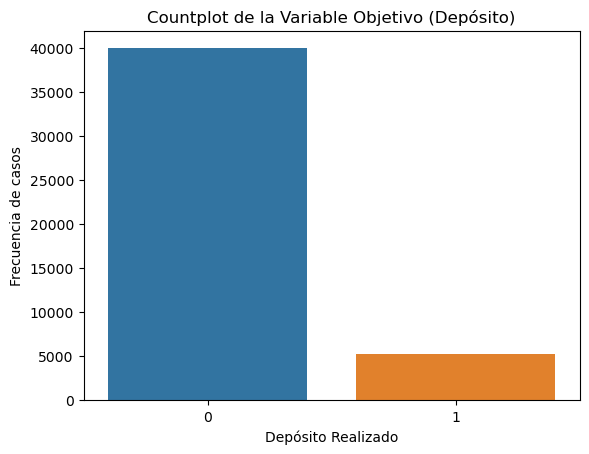

La conclusión es que la mayoria de clientes no ha realizado el depósito, ya que la frecuencia de si es 5000 y la de no 40000, es decir, 8 veces más


In [21]:
sns.countplot(x='deposit', data=bank_data)
plt.xlabel('Depósito Realizado')
plt.ylabel('Frecuencia de casos')
plt.title('Countplot de la Variable Objetivo (Depósito)')
plt.show()
print('La conclusión es que la mayoria de clientes no ha realizado el depósito, ya que la frecuencia de si es 5000 y la de no 40000, es decir, 8 veces más')

## Análisis exploratorio de las variables predictoras

**Muestra la distribución por edades de los clientes. Usa el tipo de visualización que quieras.**

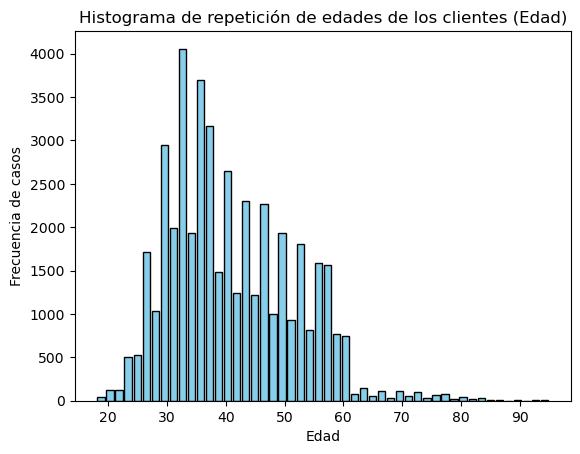

In [22]:
plt.hist(bank_data['age'], bins=50, color='skyblue', edgecolor='black', rwidth=0.8)
plt.xlabel('Edad')
plt.ylabel('Frecuencia de casos')
plt.title('Histograma de repetición de edades de los clientes (Edad)')
plt.show()

**Crea un barplot para cada una de las variables predictoras categóricas del dataset en función de la variable de salida.**

In [23]:
variables_categoricas_bank = bank_data.select_dtypes(include='object').columns
print(variables_categoricas_bank)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')


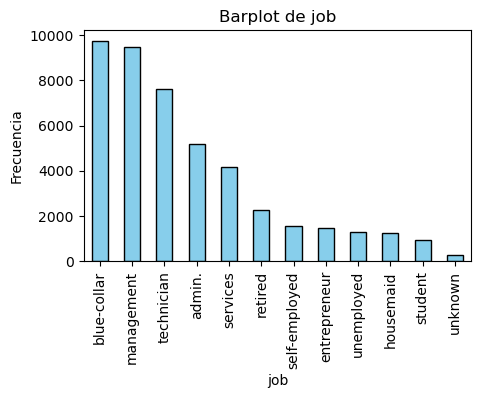

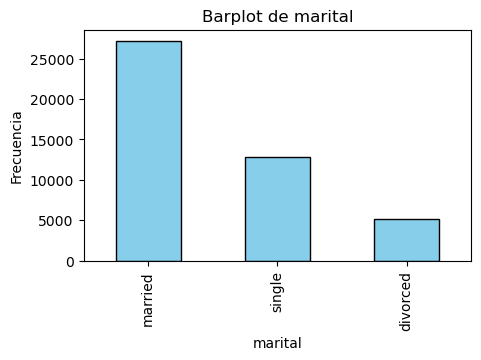

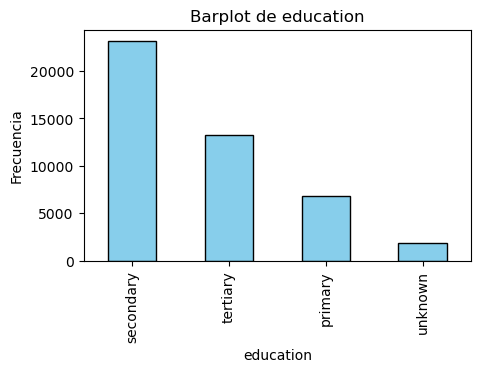

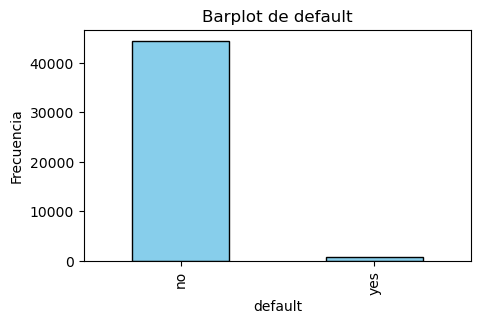

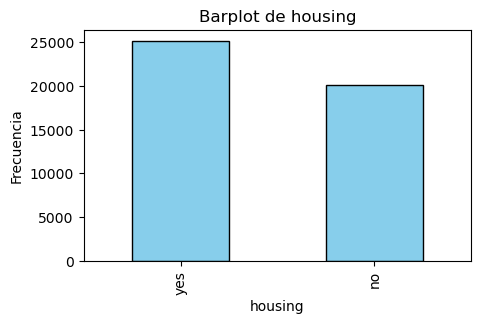

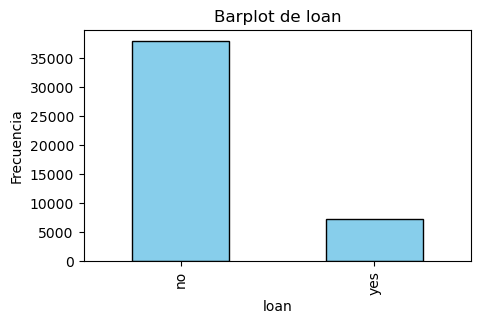

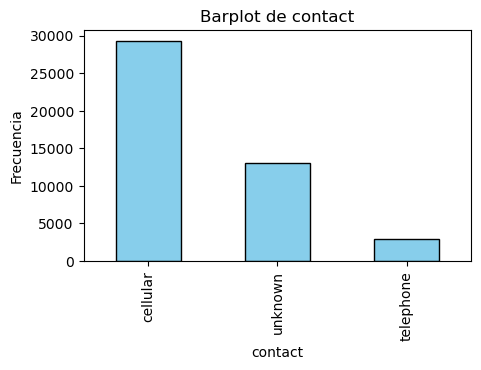

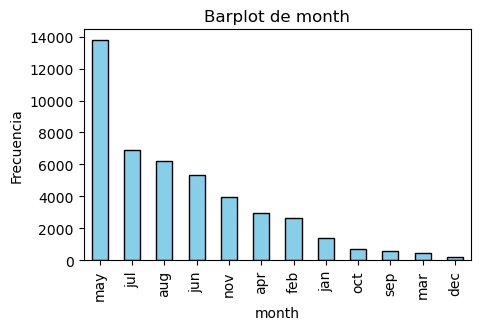

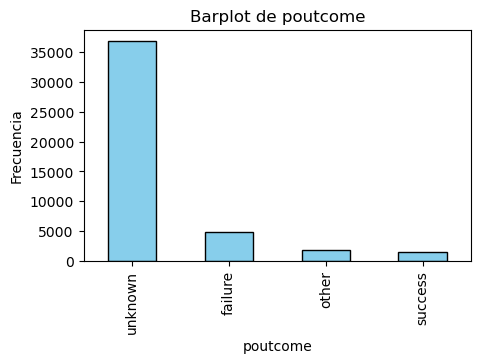

In [24]:
columnas_a_visualizar = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome']
for columna in columnas_a_visualizar:
    plt.figure(figsize=(5, 3))
    bank_data[columna].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Barplot de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

**Usa un pairplot para mostrar la distribución y las relaciones de las variables numéricas predictoras en base a la variable de salida.**

In [25]:
variables_numericas_bank = bank_data.select_dtypes(include='number').columns
print(variables_numericas_bank)

Index(['age', 'balance', 'dadeposit', 'duration', 'campaign', 'pdadeposits',
       'previous', 'deposit'],
      dtype='object')


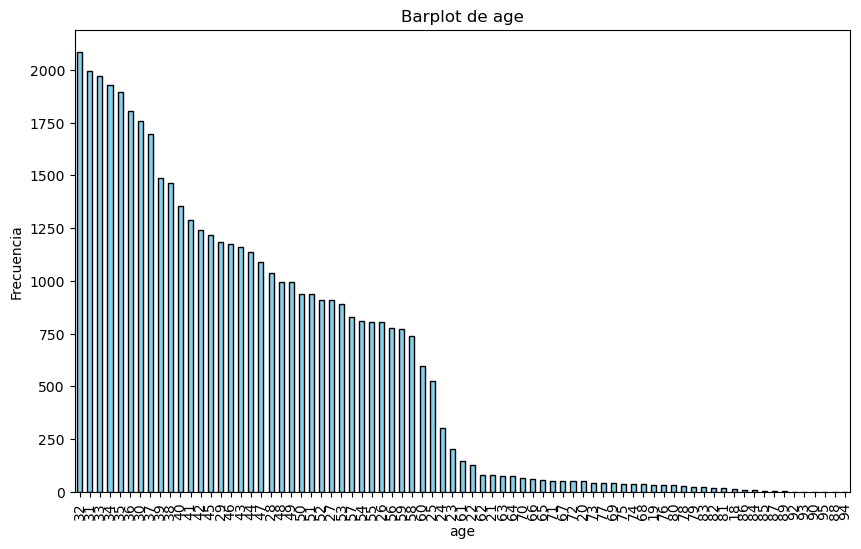

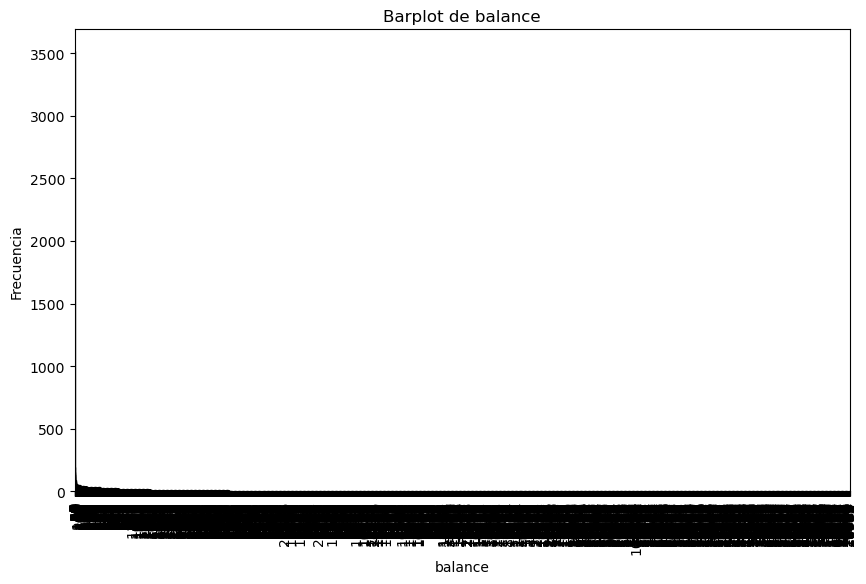

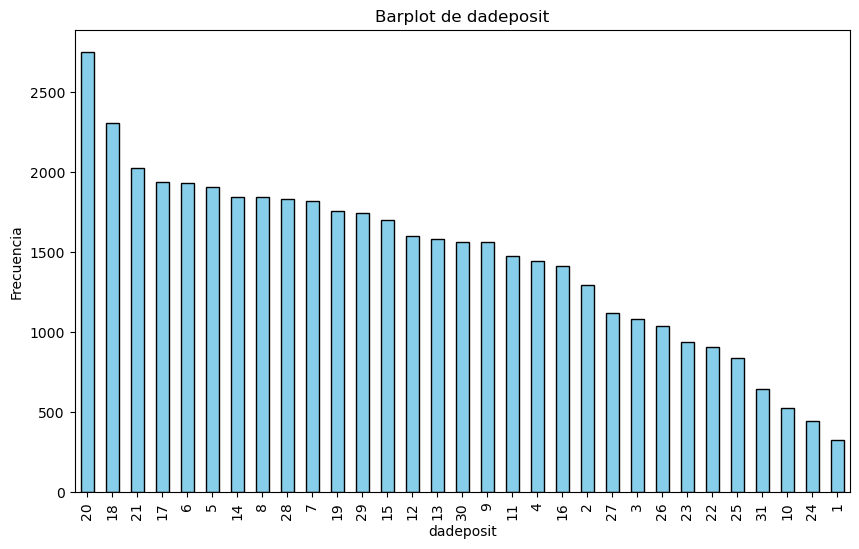

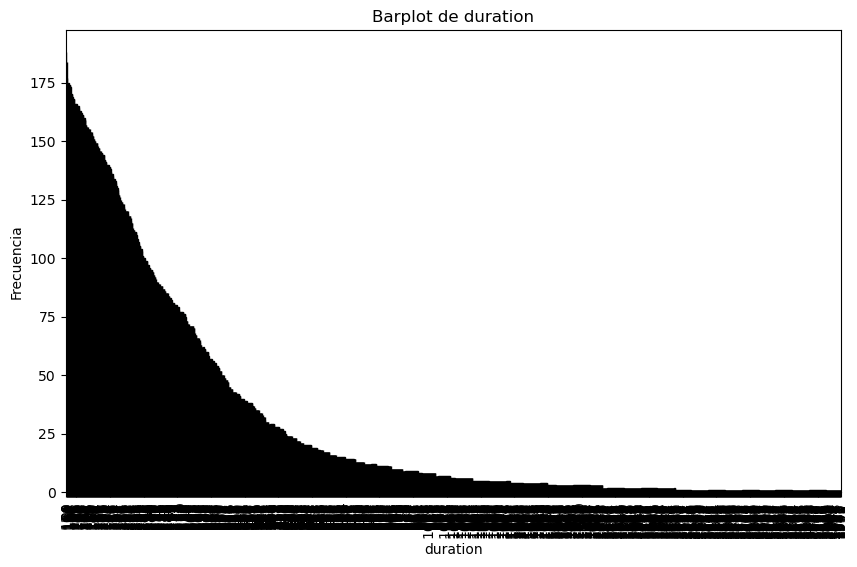

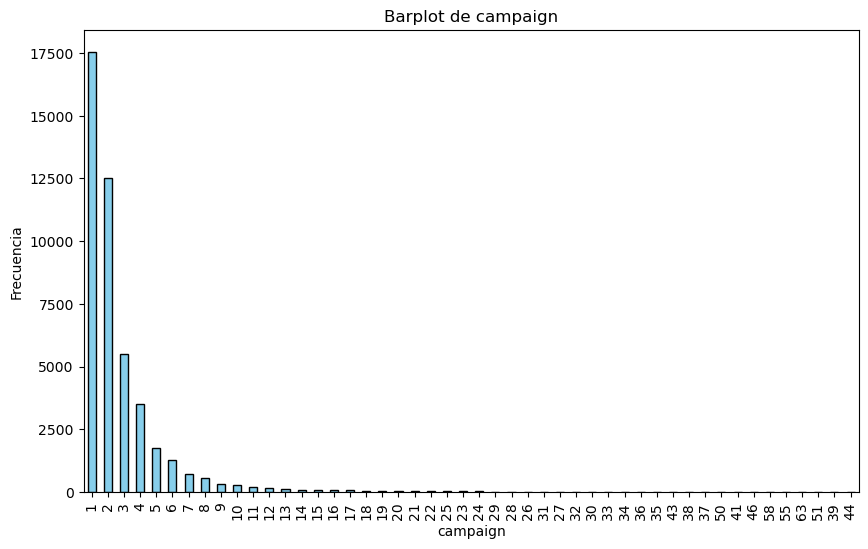

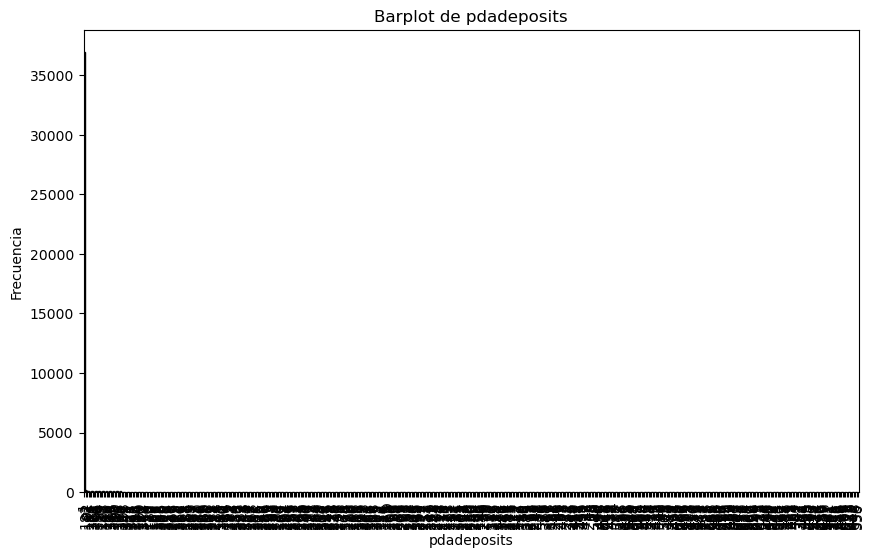

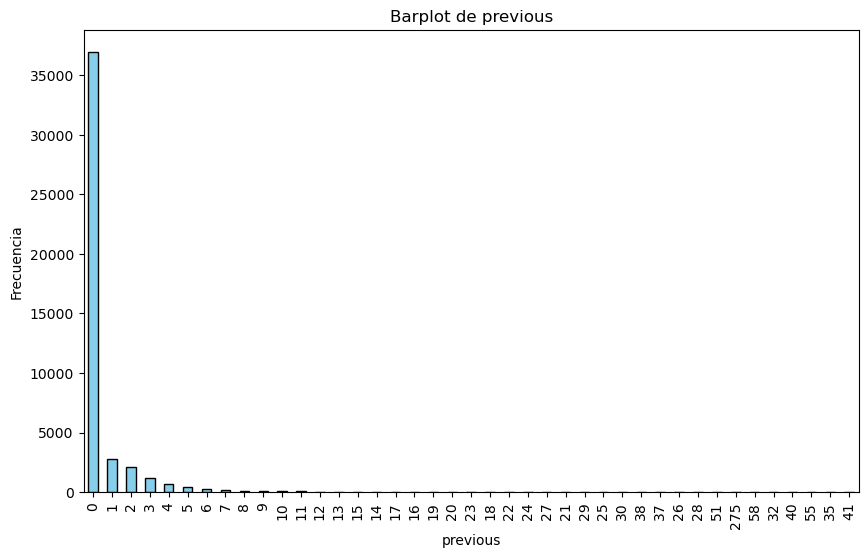

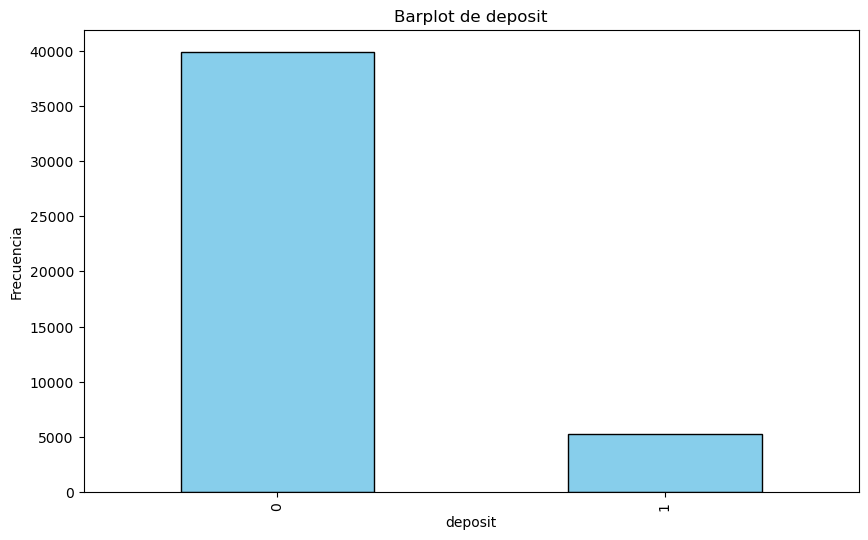

In [26]:

for columna in variables_numericas_bank:
    plt.figure(figsize=(10, 6))
    bank_data[columna].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Barplot de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

In [27]:
# Se ve algo raro alguna de las gráficas


**Transforma los meses en su correspondiente número, y muestra el conteo antes y después para ver que has realizado la modificación correctamente.**

In [28]:
#Creamos un diccionario para mapear los meses
meses_a_numeros = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}
# Mostrar el conteo antes de la transformación
conteo_antes = bank_data['month'].value_counts()
# Imprimir resultados
print("Conteo antes de la transformación:")
print(conteo_antes)


Conteo antes de la transformación:
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64


In [29]:
# Realizar la transformación de meses a números en minúsculas
bank_data['month'] = bank_data['month'].astype(str).str.lower().map(meses_a_numeros)

# Mostrar el conteo después de la transformación
conteo_despues = bank_data['month'].value_counts()
print("\nConteo después de la transformación:")
print(conteo_despues)


Conteo después de la transformación:
month
5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: count, dtype: int64


**Transforma las variables categóricas binarias `default`, `housing` y `loan` en variables numéricas de tipo `0/1`. A continuación, muéstralas para ver que la transformación ha sido correcta.**

In [30]:
print(bank_data['default'])
print(bank_data['housing'])
print(bank_data['loan'])

0        no
1        no
2        no
3        no
4        no
         ..
45206    no
45207    no
45208    no
45209    no
45210    no
Name: default, Length: 45211, dtype: object
0        yes
1        yes
2        yes
3        yes
4         no
        ... 
45206     no
45207     no
45208     no
45209     no
45210     no
Name: housing, Length: 45211, dtype: object
0         no
1         no
2        yes
3         no
4         no
        ... 
45206     no
45207     no
45208     no
45209     no
45210     no
Name: loan, Length: 45211, dtype: object


In [31]:
# Mapeo para las tres columnas
mapeo_binario = {'yes': 1, 'no': 0}
# Lista de columnas a las que aplicar el mapeo
columnas_a_mapear = ['default', 'housing', 'loan']
# Mostrar el conteo antes de la transformación
conteo_antes = bank_data[columnas_a_mapear].apply(pd.value_counts)
# Aplicar el mapeo a cada columna
for columna in columnas_a_mapear:
    bank_data[columna] = bank_data[columna].replace(mapeo_binario)
# Mostrar el conteo después de la transformación
conteo_despues = bank_data[columnas_a_mapear].apply(pd.value_counts)

C:\Users\olive\AppData\Local\Temp\ipykernel_7796\2091062596.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  conteo_antes = bank_data[columnas_a_mapear].apply(pd.value_counts)
C:\Users\olive\AppData\Local\Temp\ipykernel_7796\2091062596.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  conteo_antes = bank_data[columnas_a_mapear].apply(pd.value_counts)
C:\Users\olive\AppData\Local\Temp\ipykernel_7796\2091062596.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  conteo_antes = bank_data[columnas_a_mapear].apply(pd.value_counts)
C:\Users\olive\AppData\Local\Temp\ipykernel_7796\2091062596.py:11: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() inste

In [32]:
print(bank_data['default'])
print(bank_data['housing'])
print(bank_data['loan'])

0        0
1        0
2        0
3        0
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: default, Length: 45211, dtype: int64
0        1
1        1
2        1
3        1
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: housing, Length: 45211, dtype: int64
0        0
1        0
2        1
3        0
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: loan, Length: 45211, dtype: int64


**Cuántos clientes NO han sido contactados nunca.**

In [33]:
# Identificamos los valores únicos en la columna contact
valores_contacto = bank_data['contact'].unique()
# Contar cuántos clientes no han sido contactados nunca (asumiendo 'unknown' como indicador de no contacto)
clientes_no_contactados = bank_data[bank_data['contact'] == 'unknown'].shape[0]
# Imprimimos
print("Valores únicos en la columna 'contact':", valores_contacto)
print("\nNúmero de clientes que no han sido contactados nunca:", clientes_no_contactados)

Valores únicos en la columna 'contact': ['unknown' 'cellular' 'telephone']

Número de clientes que no han sido contactados nunca: 13020


**De los clientes que fueron contactados previamente, ¿cuántos días han pasado desde que contactaron al primero?**

In [34]:
#Nos aseguramos de que las columnas que necesitamos existen
print(bank_data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'dadeposit', 'month', 'duration', 'campaign',
       'pdadeposits', 'previous', 'poutcome', 'deposit'],
      dtype='object')


In [35]:
# Para evitar confusiones, cambiamos el nombre de la columna 'dadeposit' a 'day'
bank_data = bank_data.rename(columns={'dadeposit': 'day'})
# Imprimimos todas las columnas para verificar el cambio
print(bank_data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdadeposits', 'previous', 'poutcome', 'deposit'],
      dtype='object')


In [36]:
bank_data['year'] = 2023
# Imprimimos el DataFrame para verificar la adición de la nueva columna
print(bank_data)

       age           job   marital  education  default  balance  housing  \
0       58    management   married   tertiary        0     2143        1   
1       44    technician    single  secondary        0       29        1   
2       33  entrepreneur   married  secondary        0        2        1   
3       47   blue-collar   married    unknown        0     1506        1   
4       33       unknown    single    unknown        0        1        0   
...    ...           ...       ...        ...      ...      ...      ...   
45206   51    technician   married   tertiary        0      825        0   
45207   71       retired  divorced    primary        0     1729        0   
45208   72       retired   married  secondary        0     5715        0   
45209   57   blue-collar   married  secondary        0      668        0   
45210   37  entrepreneur   married  secondary        0     2971        0   

       loan    contact  day  month  duration  campaign  pdadeposits  previous  \
0     

In [37]:
# Creamos una nueva columna 'date' combinando day como dia, month y con la columna year que hemos creado, dd-mm-yyyy
# pd.to_datetime para convertir esta cadena en objetos de tipo datetime
# errors='coerce': Cuando errors está configurado en 'coerce', cualquier error durante la conversión resultará en un valor de NaT (Not a Time) en lugar de lanzar una excepción.
bank_data['date'] = pd.to_datetime(bank_data[['day', 'month', 'year']].astype(str).agg('-'.join, axis=1), format='%d-%m-%Y', errors='coerce')
# Filtramos las filas con contacto previo (poutcome es diferente de unknown), creamos un nuevo dataframe llamado contacto_previo
contacto_previo = bank_data[bank_data['poutcome'] != 'unknown']
# Calculamos la diferencia en días desde el primer contacto
contacto_previo['dias_desde_primer_contacto'] = (contacto_previo['date'] - contacto_previo.groupby('contact')['date'].transform('min')).dt.days
# Imprimimos los resultados
print(contacto_previo[['contact', 'date', 'dias_desde_primer_contacto']])
#Aparecerá a continuación un error, me recomiendan utilizar .loc tras contacto_previo.loc, para evitar posibles poblemas

         contact       date  dias_desde_primer_contacto
24060  telephone 2023-10-21                         283
24062  telephone 2023-10-21                         283
24064  telephone 2023-10-21                         283
24072  telephone 2023-10-22                         284
24077  telephone 2023-10-23                         285
...          ...        ...                         ...
45199   cellular 2023-11-16                         312
45201   cellular 2023-11-17                         313
45204   cellular 2023-11-17                         313
45208   cellular 2023-11-17                         313
45210   cellular 2023-11-17                         313

[8252 rows x 3 columns]


C:\Users\olive\AppData\Local\Temp\ipykernel_7796\2317748570.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contacto_previo['dias_desde_primer_contacto'] = (contacto_previo['date'] - contacto_previo.groupby('contact')['date'].transform('min')).dt.days


**Realiza 3 consultas que te parezcan interesantes al conjunto de datos similares a las dos anteriores usando lo que aprendiste en el notebook de práctica. Otro ejemplo: "¿Qué clientes que trabajan como técnicos han contratado un depósito?".**

In [38]:
clientes_tecnicos_con_deposito = bank_data[(bank_data['job'] == 'technician') & (bank_data['deposit'] == 1)]
# Imprimirmos los resultados, el count no es necesario ya que nos saca el total de filas
print(clientes_tecnicos_con_deposito[['job', 'deposit']])

              job  deposit
87     technician        1
446    technician        1
457    technician        1
624    technician        1
694    technician        1
...           ...      ...
45160  technician        1
45182  technician        1
45200  technician        1
45205  technician        1
45206  technician        1

[840 rows x 2 columns]


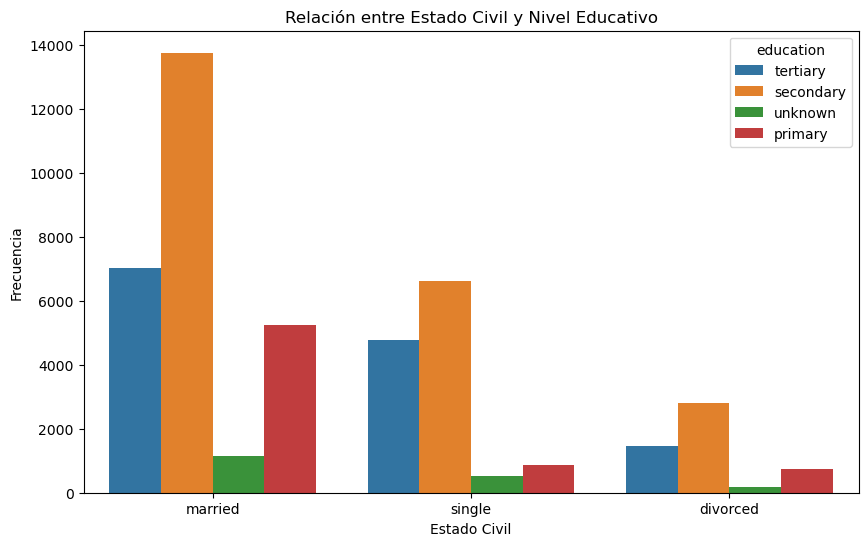

In [39]:
# Gráfico de barras apiladas para relación entre Estado Civil y Nivel Educativo
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', hue='education', data=bank_data)
plt.title('Relación entre Estado Civil y Nivel Educativo')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.show()

In [70]:
# Gráfico de caja para la correlación entre la duración del contacto y y si realizan o no de depósito
plt.figure(figsize=(10, 6))
sns.boxplot(x='deposit', y='duration', data=bank_data)
plt.title('Impacto de la Duración del Contacto en la Decisión de Depósito')
plt.xlabel('Decisión de Depósito')
plt.ylabel('Duración del Contacto (segundos)')
plt.show()

ValueError: Could not interpret input 'duration'

<Figure size 1000x600 with 0 Axes>

**Muestra 2 visualizaciones que te parezcan interesantes usando los datos del dataset e indica qué conclusiones sacas de ellas. Por ejemplo: "Crea un scatterplot con la edad del cliente y el dinero que tiene en la cuenta (`balance`)".**

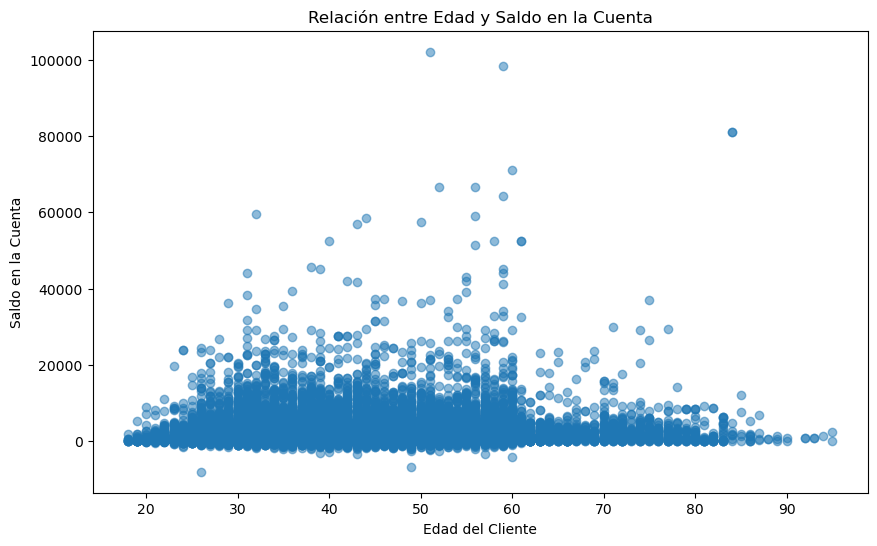

In [41]:
# Scatterplot de edad vs. saldo en la cuenta, añado alpha para la transparencia de los puntos
plt.figure(figsize=(10, 6))
plt.scatter(bank_data['age'], bank_data['balance'], alpha=0.5)
plt.title('Relación entre Edad y Saldo en la Cuenta')
plt.xlabel('Edad del Cliente')
plt.ylabel('Saldo en la Cuenta')
plt.show()

In [42]:
# Como se nota la jubilación

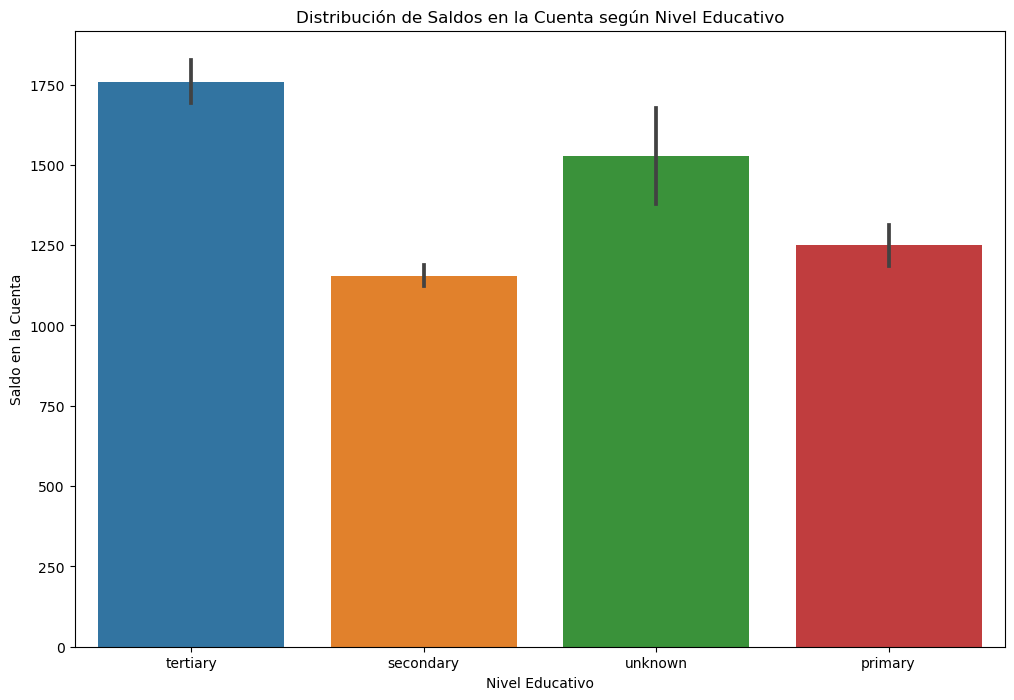

In [43]:
# Gráfico de barras de saldos en la cuenta por nivel educativo
plt.figure(figsize=(12, 8))
sns.barplot(x='education', y='balance', data=bank_data)
plt.title('Distribución de Saldos en la Cuenta según Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Saldo en la Cuenta')
plt.show()

**Sustituye el valor -1 de `pdays` por un valor grande (por ejemplo 10.000) para que refleje que hace mucho que no se le ha contactado (similar a no haberle contactado nunca).**

In [44]:
# Para evitar confusiones, cambiamos el nombre de la columna 'pdadeposits' a 'pdays' ya que al hacer la copia ha cambiado
bank_data = bank_data.rename(columns={'pdadeposits': 'pdays'})
bank_data['pdays'] = bank_data['pdays'].replace(-1, 10000)
print(bank_data['pdays'])

0        10000
1        10000
2        10000
3        10000
4        10000
         ...  
45206    10000
45207    10000
45208      184
45209    10000
45210      188
Name: pdays, Length: 45211, dtype: int64


**Crea una nueva columna llamada `recent_pdays` que refleje aquellos contactos que son más recientes con los valores mas grandes, y los que nunca se les ha contactado con los valores más pequeños (siempre positivos). Para esto, haz el inverso del valor de `pdays`.**

In [45]:
# Creamos la nueva columna 'recent_pdays'
bank_data['recent_pdays'] = 1 / bank_data['pdays'].replace(-1, 1)
# Inverso, y asigna 1 para aquellos que nunca fueron contactados, cuanto más cercano a 1 sea el float hace menos tiempo que se le contactó
# Imprimimos para verificar
print(bank_data[['pdays', 'recent_pdays']])

       pdays  recent_pdays
0      10000      0.000100
1      10000      0.000100
2      10000      0.000100
3      10000      0.000100
4      10000      0.000100
...      ...           ...
45206  10000      0.000100
45207  10000      0.000100
45208    184      0.005435
45209  10000      0.000100
45210    188      0.005319

[45211 rows x 2 columns]


**Comprueba los valores mínimo y máximo de la variable `recent_pdays`.**

In [46]:
min_recent_pdays = bank_data['recent_pdays'].min()
max_recent_pdays = bank_data['recent_pdays'].max()

print(f'Valor mínimo de recent_pdays: {min_recent_pdays}')
print(f'Valor máximo de recent_pdays: {max_recent_pdays}')

Valor mínimo de recent_pdays: 0.0001
Valor máximo de recent_pdays: 1.0


f'...': Se utiliza una f-string (format string) para formatear la cadena de salida. Dentro de la cadena, puedes incluir expresiones entre llaves {} que serán evaluadas y formateadas en el resultado final.

'Valor mínimo de recent_pdays: {min_recent_pdays}': Esto es el texto que se imprimirá. {min_recent_pdays} se sustituirá con el valor de la variable min_recent_pdays dentro de la cadena.

**Puesto que ya no la necesitamos, elimina la columna `pdays`.**

In [47]:
bank_data = bank_data.drop('pdays', axis=1)
print(bank_data)


       age           job   marital  education  default  balance  housing  \
0       58    management   married   tertiary        0     2143        1   
1       44    technician    single  secondary        0       29        1   
2       33  entrepreneur   married  secondary        0        2        1   
3       47   blue-collar   married    unknown        0     1506        1   
4       33       unknown    single    unknown        0        1        0   
...    ...           ...       ...        ...      ...      ...      ...   
45206   51    technician   married   tertiary        0      825        0   
45207   71       retired  divorced    primary        0     1729        0   
45208   72       retired   married  secondary        0     5715        0   
45209   57   blue-collar   married  secondary        0      668        0   
45210   37  entrepreneur   married  secondary        0     2971        0   

       loan    contact  day  month  duration  campaign  previous poutcome  \
0         

**Dentro de la variable `poutcome` incluye los `other` dentro de los `unknown`, ya que realmente no sabemos qué representan y no parece tener mucho sentido tener ambas separadas. Muestra un conteo de esta variable para ver el resultado.**

In [48]:
conteo_poutcome = bank_data['poutcome'].value_counts()
print(conteo_poutcome)

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64


In [49]:
# Combinamos los valores 'other' y 'unknown' dentro de 'poutcome'
bank_data['poutcome'] = bank_data['poutcome'].replace('other', 'unknown')
# Vemos el conteo actualizado de 'poutcome'
conteo_poutcome = bank_data['poutcome'].value_counts()
print(conteo_poutcome)

poutcome
unknown    38799
failure     4901
success     1511
Name: count, dtype: int64


**Eliminamos `contact`, ya que no nos aporta información, y la columna `duration` ya que en el enunciado nos advierten que esta información no está realmente disponible a la hora de hacer la predicción y nos haría incurrir en una fuga de datos.**

In [50]:
bank_data = bank_data.drop('contact', axis=1)
bank_data = bank_data.drop('duration', axis=1)

In [51]:
print(bank_data)

       age           job   marital  education  default  balance  housing  \
0       58    management   married   tertiary        0     2143        1   
1       44    technician    single  secondary        0       29        1   
2       33  entrepreneur   married  secondary        0        2        1   
3       47   blue-collar   married    unknown        0     1506        1   
4       33       unknown    single    unknown        0        1        0   
...    ...           ...       ...        ...      ...      ...      ...   
45206   51    technician   married   tertiary        0      825        0   
45207   71       retired  divorced    primary        0     1729        0   
45208   72       retired   married  secondary        0     5715        0   
45209   57   blue-collar   married  secondary        0      668        0   
45210   37  entrepreneur   married  secondary        0     2971        0   

       loan  day  month  campaign  previous poutcome  deposit  year  \
0         0    5

**Para poder pasarle los datos al algoritmo k-NN necesitamos convertir todas las variables categóricas a numéricas. Para ello vamos a usar un método conocido como _one-hot encoding_, que lo que hace es asignar a cada categoría un vector que contiene `1s` y `0s`, lo que denota la presencia o ausencia de esa característica. Usa la función `get_dummies()` de Pandas.**


tenemos que ir columna por columna con este método para poder cambiar de categorías a numéricas.
job_numeric = pd.get_dummies(bank_data.job)
marital_numeric = pd.get_dummies(bank_data.marital)
education_numeric = pd.get_dummies(bank_data.education)
poutcome_numeric = pd.get_dummies(bank_data.poutcome)
index = poutcome_numeric.loc[index]
print(index)

 No tengo muy clara esta parte, por eso la dejo comentada, por que me falta algo que no estoy comprendiendo entre los dos datos,
 para despues sustituirlos, y no quiero cargarme la base de datos.(Víctor)
bank_data = pd.concat([
     bank_data.drop("embarked", axis = 1),
     data
 ], axis = 1)
 bank_data.head()

In [52]:
# Imprimimos los tipos de datos de cada columna
tipos_de_datos = bank_data.dtypes
# Filtramos las columnas que tienen tipos de datos categóricos, ya que con los cambios anteriores nuestra variable ya no sirve
columnas_categoricas2 = tipos_de_datos[tipos_de_datos == 'object'].index.tolist()
# Ahora, columnas_categoricas2 contiene los nombres de las columnas categóricas, vamos a hacerlo descriptivo
print("Columnas categóricas:", columnas_categoricas2)

Columnas categóricas: ['job', 'marital', 'education', 'poutcome']


In [53]:
# Marcamos las columnas categóricas en una variable
columnas_categoricas2 = ['job', 'marital', 'education', 'poutcome']
# Aplicamos one-hot encoding usando get_dummies
bank_data_encoded = pd.get_dummies(bank_data, columns=columnas_categoricas2)
# Ahora, bank_data_encoded contendrá las variables categóricas convertidas a numéricas mediante one-hot encoding
print(bank_data_encoded)

       age  default  balance  housing  loan  day  month  campaign  previous  \
0       58        0     2143        1     0    5      5         1         0   
1       44        0       29        1     0    5      5         1         0   
2       33        0        2        1     1    5      5         1         0   
3       47        0     1506        1     0    5      5         1         0   
4       33        0        1        0     0    5      5         1         0   
...    ...      ...      ...      ...   ...  ...    ...       ...       ...   
45206   51        0      825        0     0   17     11         3         0   
45207   71        0     1729        0     0   17     11         2         0   
45208   72        0     5715        0     0   17     11         5         3   
45209   57        0      668        0     0   17     11         4         0   
45210   37        0     2971        0     0   17     11         2        11   

       deposit  ...  marital_divorced marital_marri

In [54]:
#Para no equivocarnos, vamos a ver qué columnas ha creado
print(bank_data_encoded.columns)

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'campaign', 'previous', 'deposit', 'year', 'date', 'recent_pdays',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'poutcome_failure', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


In [55]:
# Que sean valores True o False y que haya dupicado los datos ya que hay más de un tipo de valor, nos puede confundir, así que
# Creamos un diccionario de mapeo para cada columna, ya que otros métodos me daban error
mapeo_por_columna = { 'job_admin.': {True: 1, False: 0},
                      'job_blue-collar': {True: 1, False: 0},
                      'job_entrepreneur': {True: 1, False: 0},
                      'job_housemaid': {True: 1, False: 0},
                      'job_management': {True: 1, False: 0},
                      'job_retired': {True: 1, False: 0},
                      'job_self-employed': {True: 1, False: 0},
                      'job_services': {True: 1, False: 0},
                      'job_student': {True: 1, False: 0},
                      'job_technician': {True: 1, False: 0},
                      'job_unemployed': {True: 1, False: 0},
                      'job_unknown': {True: 1, False: 0},
                      'marital_divorced': {True: 1, False: 0},
                      'marital_married': {True: 1, False: 0},
                      'marital_single': {True: 1, False: 0},
                      'education_primary': {True: 1, False: 0},
                      'education_secondary': {True: 1, False: 0},
                      'education_tertiary': {True: 1, False: 0},
                      'education_unknown': {True: 1, False: 0},
                      'poutcome_failure': {True: 1, False: 0},
                      'poutcome_success': {True: 1, False: 0},
                      'poutcome_unknown': {True: 1, False: 0}


                    }

# Aplicamos el mapeo a cada columna para que lo devuelva correctamente
for columna, mapeo in mapeo_por_columna.items():
    bank_data_encoded[columna] = bank_data_encoded[columna].replace(mapeo)
print(bank_data_encoded)

       age  default  balance  housing  loan  day  month  campaign  previous  \
0       58        0     2143        1     0    5      5         1         0   
1       44        0       29        1     0    5      5         1         0   
2       33        0        2        1     1    5      5         1         0   
3       47        0     1506        1     0    5      5         1         0   
4       33        0        1        0     0    5      5         1         0   
...    ...      ...      ...      ...   ...  ...    ...       ...       ...   
45206   51        0      825        0     0   17     11         3         0   
45207   71        0     1729        0     0   17     11         2         0   
45208   72        0     5715        0     0   17     11         5         3   
45209   57        0      668        0     0   17     11         4         0   
45210   37        0     2971        0     0   17     11         2        11   

       deposit  ...  marital_divorced marital_marri

**Muestra la matriz de correlación de las variables.**

In [56]:
tipos_de_datos2 = bank_data_encoded.dtypes
# Filtramos las columnas que tienen tipo de dato 'category'
columnas_categoricas_sino = tipos_de_datos2[tipos_de_datos2 == 'category'].index.tolist()
# Imprimimos los nombres de las columnas categóricas (si las hay), si no, dime que no hay, ya que la matriz solo funciona con valors numéricos
if columnas_categoricas_sino:
    print("Columnas categóricas restantes:", columnas_categoricas_sino)
else:
    print("No hay columnas categóricas en el DataFrame.")

No hay columnas categóricas en el DataFrame.


In [57]:
# Calculamos la matriz de correlación
matriz_correlacion = bank_data_encoded.corr()
# Mostramos la matriz de correlación
print("Matriz de correlación:\n", matriz_correlacion)

Matriz de correlación:
                           age   default   balance   housing      loan  \
age                  1.000000 -0.017879  0.097783 -0.185513 -0.015655   
default             -0.017879  1.000000 -0.066745 -0.006025  0.077234   
balance              0.097783 -0.066745  1.000000 -0.068768 -0.084350   
housing             -0.185513 -0.006025 -0.068768  1.000000  0.041323   
loan                -0.015655  0.077234 -0.084350  0.041323  1.000000   
day                 -0.009120  0.009424  0.004503 -0.027982  0.011370   
month                0.092903  0.014989  0.094605 -0.173887  0.021638   
campaign             0.004760  0.016822 -0.014578 -0.023599  0.009980   
previous             0.001288 -0.018329  0.016674  0.037076 -0.011043   
deposit              0.025155 -0.022419  0.052838 -0.139173 -0.068185   
year                      NaN       NaN       NaN       NaN       NaN   
date                 0.090876  0.015640  0.094136 -0.176142  0.022214   
recent_pdays         0.0128

## División conjuntos de entrenamiento y prueba

Vamos a dividir nuestro conjunto de datos en dos subconjuntos, uno de entrenamiento con el que vamos a entrenar el algoritmo y otro de prueba con el que vamos a medir el desempeño del algoritmo con datos nuevos que no ha visto nunca.

**Separa las variables de entrada de la variable de salida y asígnalas a dos variables llamadas `X` e `y` respectivamente.**

In [58]:
# Dividimos el data en conjunto de entrenamiento y conjunto de test, uno para cada en x e y.
# La variable x serán todos los datos excepto la variable que queremos predecir, que antes era y y ahora es deposit
# Posteriormente me dará problemas la columna date por no ser un float64, asi que como tenemos el resto de datos en otras columnas, prescindimos de ella
columnas_x = ['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
                           'campaign', 'previous', 'year', 'recent_pdays',
                           'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
                           'job_management', 'job_retired', 'job_self-employed', 'job_services',
                           'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
                           'marital_divorced', 'marital_married', 'marital_single',
                           'education_primary', 'education_secondary', 'education_tertiary',
                           'education_unknown', 'poutcome_failure', 'poutcome_success',
                           'poutcome_unknown']
# Separamos las variables de entrada (X) y la variable de salida (y)
X = bank_data_encoded[columnas_x]
y = bank_data_encoded['deposit']

**Divide el dataset en los conjuntos de entrenamiento y prueba usando la función `train_test_split()` de la librería Scikit-Learn en una proporción de 75/25. ¿Para qué sirven los parámetros `random_state` y `stratify`?**

In [59]:
# Usamos el tamaño del test en un 25%, por eso ponemos 0.25 y el random_state lo asignamos a un número para poder tener control sobre él
# random_state=0 proporciona reproducibilidad, ya que siempre obtendremos la misma división si usamos el mismo valor, utilizamos el 42 por convención
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
# Usamos stratify para garantizar que la proporción de clases en los conjuntos de entrenamiento y prueba sea similar a la proporción original en el conjunto de datos completo
# Imprimimos las formas (shapes) de los conjuntos resultantes para ver cómo quedan
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (33908, 33)
Forma de X_test: (11303, 33)
Forma de y_train: (33908,)
Forma de y_test: (11303,)


## Normalización de los datos

Los algoritmos basados en el cálculo de distancias como k-NN funcionan mejor cuando los datos que les pasamos están normalizados. La normalización es una técnica de escalado en la que los puntos de datos se escalan para que encajen entre 0 y 1, es decir, es el proceso de reescalar los valores en un rango de [0, 1].

**Normaliza los datos de entrenamiento y prueba usando la función `MinMaxScaler()` de la librería Scikit-Learn.**

In [60]:
# Primero, inicializamos MinMaxScaler
scaler = MinMaxScaler()
# Ajustamos y transformamos los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)
# Transformamos los datos de prueba utilizando el mismo scaler
X_test_scaled = scaler.transform(X_test)

In [61]:
# Imprimimos algunos valores de x_train y x_test antes y después de la normalización, por ejemplo 5 filas, para ver cómo funciona
print("Valores originales de X_train:\n", X_train.iloc[:5, :])
print("\nValores normalizados de X_train:\n", X_train_scaled[:5, :])
print("Valores originales de X_test:\n", X_test.iloc[:5, :])
print("\nValores normalizados de X_test:\n", X_test_scaled[:5, :])

Valores originales de X_train:
        age  default  balance  housing  loan  day  month  campaign  previous  \
24915   58        0        0        1     0   18     11         1         1   
11794   47        0      287        0     0   20      6         1         0   
1279    35        0      797        1     0    8      5         1         0   
913     34        0      627        1     0    7      5         2         0   
5554    35        0       91        1     0   23      5         4         0   

       year  ...  marital_divorced  marital_married  marital_single  \
24915  2023  ...                 0                1               0   
11794  2023  ...                 1                0               0   
1279   2023  ...                 0                0               1   
913    2023  ...                 1                0               0   
5554   2023  ...                 0                0               1   

       education_primary  education_secondary  education_tertiary 

## Entrenamiento modelo

Vamos a usar el modelo _**k-Nearest Neighbors**_ para crear un clasificador que nos permita predecir a partir de los datos que tenemos si un cliente contratará o no el depósito a plazo como resultado de la campaña de marketing.

**Crea un clasificador k-NN y busca el número de vecinos más cercanos que mejor funciona. Prueba diferentes valores de `k`, por ejemplo entre 1 y 20.**

In [69]:
# Definición de listas para almacenar resultados
# Creamos precisiones, una lista que comenzará vacía y que durante el bucle for irá almacenando la precisión del valor diferente de k
valores_k = list(range(1, 21))  # Probamos valores de k desde 1 hasta 20
precisiones = []

# Bucle para probar diferentes valores de k
for k in valores_k:
    # Inicialización del clasificador k-NN con el valor actual de k
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    # Entrenamiento del modelo con los datos de entrenamiento normalizados
    knn_classifier.fit(X_train_scaled, y_train)
    # Predicciones en el conjunto de prueba
    y_pred = knn_classifier.predict(X_test_scaled)
    # Evaluación de la precisión y almacenamiento en la lista
    precision = accuracy_score(y_test, y_pred)
    precisiones.append(precision)

# Encontrar el mejor valor de k basado en la precisión máxima
mejor_k = valores_k[precisiones.index(max(precisiones))]

# Imprimir el mejor valor de k y la precisión asociada
print("Mejor valor de k:", mejor_k)
print("Precisión máxima alcanzada:", max(precisiones))

Mejor valor de k: 17
Precisión máxima alcanzada: 0.8906485003981244


**(Opcional) Muestra una gráfica con la evolución de la tasa de error en función de los diferentes valores de k.**

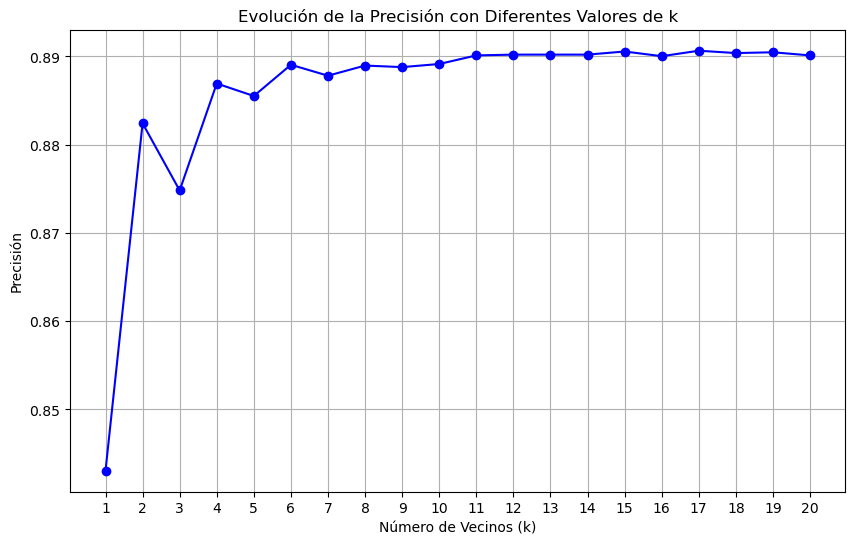

In [63]:
plt.figure(figsize=(10, 6))
# valores_k está en el eje x, precisiones está en el eje y. marker='o' especifica que se utilice un círculo como marcador en cada punto, linestyle='-' indica que se utilice una línea sólida para conectar los puntos, y color='b' establece el color de la línea como azul.
plt.plot(valores_k, precisiones, marker='o', linestyle='-', color='b')
plt.title('Evolución de la Precisión con Diferentes Valores de k')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión')
plt.xticks(valores_k)  # Para mostrar todos los valores de k en el eje x
plt.grid(True) # Para mostrar una cuadricula
plt.show()

**(Opcional) Muestra una gráfica con la evolución del accuracy en función de los diferentes valores de k.**

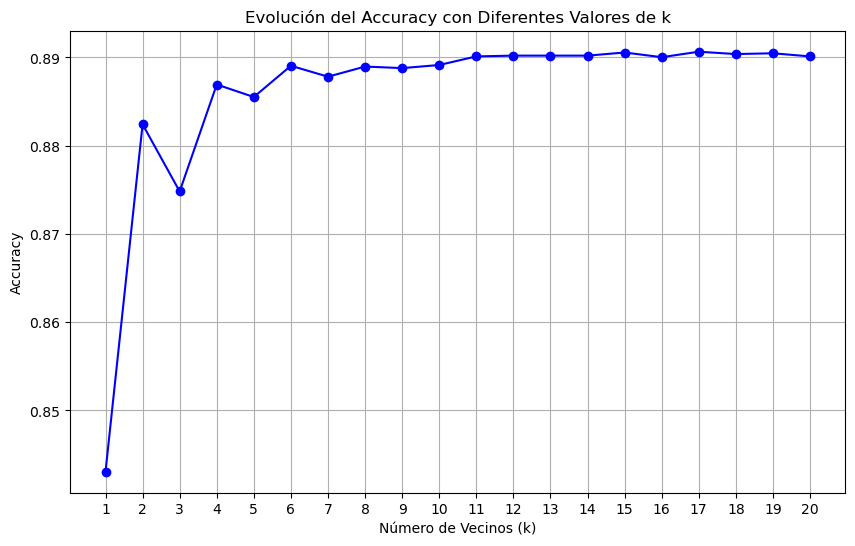

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(valores_k, precisiones, marker='o', linestyle='-', color='b')
plt.title('Evolución del Accuracy con Diferentes Valores de k')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Accuracy')
plt.xticks(valores_k)  # Para mostrar todos los valores de k en el eje x
plt.grid(True)
plt.show()

**Entrena de nuevo el clasificador con el `k` que has seleccionado.**

In [65]:
# Iniciamos del clasificador k-NN con el mejor valor de k seleccionado
knn_classifier = KNeighborsClassifier(n_neighbors=mejor_k)
# Entrenamos del modelo con los datos de entrenamiento normalizados
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=17)

## Realizar predicciones

**Realiza las predicciones para el conjunto de prueba.**

## Evaluación del modelo

**Imprime el score para los conjuntos de entrenamiento y prueba del modelo que acabas de entrenar.**

**Muestra la matriz de confunsión para el clasificador.**

**Imprime el informe de clasificación. ¿Qué conclusiones sacas?**

**Por último, crea una visualización con la curva ROC y la métrica del área bajo la curva.**

In [66]:
# Calcula el área bajo la curva


In [67]:
# Visualiza el área bajo la curva
